In [1]:
### 라이브러리 불러오기

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
# https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
### mnist 데이터 불러오기

mnist = input_data.read_data_sets('./data/', one_hot = True)
training_img = mnist.train.images
training_lab = mnist.train.labels
test_img = mnist.test.images
test_lab = mnist.test.labels

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


트레이닝 이미지의 타입은 <class 'numpy.ndarray'> 
차원은 (55000, 784)
선택한 이미지의 라벨은 6


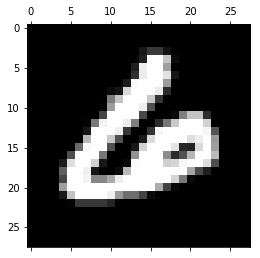

In [3]:
### mnist 데이터 살펴보기

#데이터 타입과 차원 확인
print ("트레이닝 이미지의 타입은 {}".format(type(training_img)),"\n차원은 {}".format(np.shape(training_img)))


# 임의의 데이터 선택
r = np.random.choice(len(training_img), size=1)
sample_img = training_img[r]


# 784차원의 벡터를 그림으로 그리기 위해 28*28로 사이즈 변경
sample_img = np.reshape(sample_img, (28, 28))


plt.matshow(sample_img, cmap=plt.get_cmap('gray'))
sample_lab = training_lab[r]
print ("선택한 이미지의 라벨은 {}".format(np.argmax(sample_lab)))

In [4]:
sample_lab 

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [ ]:
smaple_image

In [ ]:
# 이미지 데이터
![three](images/three.png)

In [ ]:
# 네트워크
![network](images/network.PNG)

In [5]:
# 네트워크 구조 및 가중치 설정

n_hidden_1 = 256 
n_hidden_2 = 128 
n_input    = 784 
n_class  = 10  

# INPUTS AND OUTPUTS
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_class])
    
weights = {
    'hidden_1': tf.Variable(tf.random_normal([n_input, n_hidden_1], mean=0.0, stddev=1.0)),
    'hidden_2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], mean=0.0, stddev=1.0)),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_class], mean=0.0, stddev=1.0))
}


# default가 mean=0.0, stddev=1.0 이므로 생략 가능
biases = {
    'hidden_1': tf.Variable(tf.random_normal([n_hidden_1])),
    'hidden_2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_class]))
}

In [6]:
# 네트워크 정의

hidden_1 = tf.matmul(x, weights['hidden_1']) + biases['hidden_1']
hidden_1_activation = tf.nn.sigmoid(hidden_1)

hidden_2 = tf.matmul(hidden_1_activation, weights['hidden_2']) + biases['hidden_2']
hidden_2_activation = tf.nn.sigmoid(hidden_2)

output = tf.matmul(hidden_2_activation, weights['out']) + biases['out']




#softmax = tf.nn.softmax(output)
#output_activation = -tf.reduce_sum(y * tf.log(tf.maximum(softmax, 1e-15)), 1)
output_activation = tf.nn.softmax_cross_entropy_with_logits(labels = y , logits = output)

cost = tf.reduce_mean(output_activation) 




Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [20]:
# 가중치 업데이트 (최적화)

# optm = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost) 
optm = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost) 
corr = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))    
accr = tf.reduce_mean(tf.cast(corr, "float"))


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [21]:
# PARAMETERS
training_epochs = 300
display_step    = 4

# OPTIMIZE
for epoch in range(training_epochs):

    sess.run(optm, feed_dict={x : training_img, y : training_lab})
    error = sess.run(cost, feed_dict={x : training_img, y : training_lab})
    # DISPLAY
    if (epoch+1) % display_step == 0:
        print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, error))
        feeds = {x: training_img, y: training_lab}
        train_acc = sess.run(accr, feed_dict=feeds)
        print ("TRAIN ACCURACY: %.3f" % (train_acc))
        feeds = {x: test_img, y: test_lab}
        pred, test_corr, test_acc = sess.run([tf.argmax(output, 1), corr, accr], feed_dict=feeds)
        print ("TEST ACCURACY: %.3f" % (test_acc))
print ("OPTIMIZATION FINISHED")

Epoch: 003/300 cost: 9.388776779
TRAIN ACCURACY: 0.094
TEST ACCURACY: 0.097


KeyboardInterrupt: 

In [44]:
def image_show(*args):
    

    images = {}
    pred_labels = {}
    target_labels = {}
    
    fig, axes = plt.subplots(len(args)//5+1, 5,  figsize = (30, 6*len(args)//5+1))
   
    for k in range(5-(len(args)%5)):
        fig.delaxes(axes[len(args)//5][4-k])
    
    i = 0
    for i in args:
        images[i] = np.reshape(test_img[np.where(test_corr==False)[0][i]],(28,28))
        pred_labels[i] = pred[np.where(test_corr==False)[0][i]]
        target_labels[i] = test_lab[np.where(test_corr==False)[0][i]]
        axes[args.index(i)//5, args.index(i)%5].set_title("Target : {}".format(np.argmax(target_labels[i])) +
                                  "\nPrediction : {}".format(pred_labels[i] ),  fontsize=30)    
        axes[args.index(i)//5, args.index(i)%5].imshow(images[i], cmap=plt.get_cmap('gray'))
        fig.tight_layout()
        axes[args.index(i)//5, args.index(i)%5].set_aspect('equal')        
        i += 1  
    plt.show()    

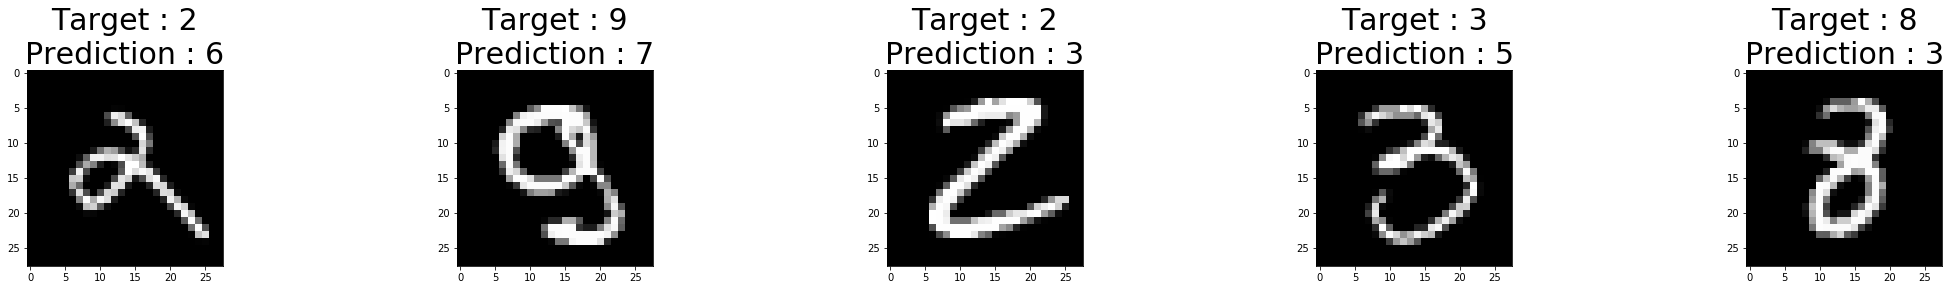

In [45]:
image_show(13,14,15,16,17)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])